# Dropout 
Objetivo: Conocer Dropout, sus parámetros y como afecta los entrenamientos de una red neuronal para clasificación de imágenes

- Dropout ignora algunas neuronas durante el entrenamiento, de forma que se puede decir que se entrenan sub-ensambles de redes

- La probabilidad de que cada neurona se desconecte se indica por 'tasa de dropout'

- Dropout ha sido empleado tambien para RNN con el método de Zoneout

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
K.clear_session()

mnist = keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape)  

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Leer Dataset

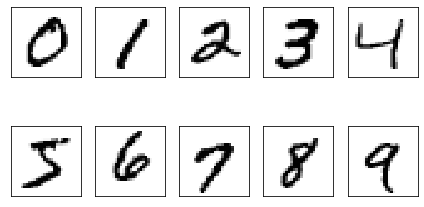

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- Se modifica la forma de los datos de 2-d (n, 28, 28) a 1-d (n, 784)

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(x_train.shape) # (60000, 784)
print(y_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(y_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
epoch = 50
verbose = 0
batch = 50

In [6]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))  
    model.add(Dropout(0.2))                        # capa Dropout
    model.add(Dense(40, activation = 'relu'))
    model.add(Dropout(0.2))                        # capa Dropout
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dropout(0.2))                        # capa Dropout
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [7]:
model = make_model()

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                31400     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4

In [8]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 0.3316 - accuracy: 0.8815

Test acccuracy: 0.8815


In [10]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))  
    model.add(Dropout(0.5))                        # capa Dropout
    model.add(Dense(40, activation = 'relu'))
    model.add(Dropout(0.5))                        # capa Dropout
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dropout(0.5))                        # capa Dropout
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [11]:
model = make_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                31400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [12]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [13]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 2.3022 - accuracy: 0.1135

Test acccuracy: 0.1135


In [14]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))  
    model.add(Dropout(0.1))                        # capa Dropout
    model.add(Dense(40, activation = 'relu'))
    model.add(Dropout(0.1))                        # capa Dropout
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dropout(0.1))                        # capa Dropout
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [15]:
model = make_model()

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                31400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [16]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 0.1365 - accuracy: 0.9436

Test acccuracy: 0.9436


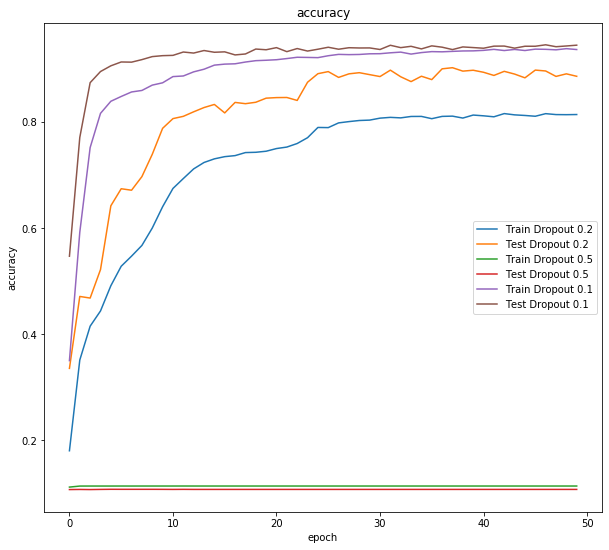

In [18]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])


plt.legend(['Train Dropout 0.2', 'Test Dropout 0.2',
            'Train Dropout 0.5', 'Test Dropout 0.5',
            'Train Dropout 0.1', 'Test Dropout 0.1'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


- Experimentar los demás parámetros de dropout
- Describir el comportamiento de Dropout con diferentes funciones de costo, capas y optimizadores.
- Comparar y combinar con otros métodos de regularización